In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np
import os
import time
import json
import gc
from glob import glob
from PIL import Image
import pickle
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import efficientnet

import string 
from numpy import array


import sys,warnings 
warnings.filterwarnings("ignore")

from tqdm import tqdm

from nltk.translate.bleu_score import sentence_bleu

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import ResNet50
import cv2 
from glob import glob

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, GRU, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/data/project03

/content/drive/MyDrive/data/project03


In [9]:
LOCAL_FLICKR_PATH = 'flickr30k_images/'
annotation_file = LOCAL_FLICKR_PATH + 'results.csv'
LOCAL_IMG_PATH = LOCAL_FLICKR_PATH + 'flickr30k_images/'

!ls {LOCAL_IMG_PATH} | wc

  31785   31785  468996


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['young girl in blue shirt is sitting on the beach with her arms crossed in the background <end>']


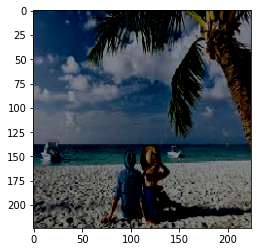

In [12]:
#Import Librarires
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image



#Import resnet model for feature extraction
extract_model = ResNet50(include_top=True)
last = extract_model.layers[-2].output
image_features_extract_model = Model(inputs = extract_model.input,outputs = last)

#Import the CNN RNN model  
reconstructed_model = load_model('model/model_ImageCap_Umair.h5')

#Import tokenizor from pickle file
with open('model/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
    

    
#State vocab size, max length(max tokens)
vocab_size = len(tokenizer.word_index) 
max_tokens = 73
START_TOKEN = '<start> '
END_TOKEN = ' <end>'
token_start = tokenizer.word_index[START_TOKEN.strip()]
token_end = tokenizer.word_index[END_TOKEN.strip()]


#Import the file, incase of an application the user will upload the file here
#image_path = 'flickr30k_images/flickr30k_images/1000366164.jpg'
image_path = 'testimg/images.jpg'
#Presprocess the image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
image = tf.keras.applications.resnet.preprocess_input(x)

#Use the prediction coding,extarct image features from ResNet50 model and RNN features from ------>
#Reconstructed model, use that model to predict
encoder_input = image_features_extract_model.predict(image)
encoder_input = tf.reshape(encoder_input,
                             (2048, ))

encoder_input = np.expand_dims(encoder_input, axis=0)

shape = (1, max_tokens)
decoder_input = np.zeros(shape=shape, dtype=np.int)

token_id = token_start

output=[]

count_tokens = 0

while token_id != token_end and count_tokens < max_tokens:
    
    decoder_input[0, count_tokens] = token_id

    input_data ={'encoder_input':encoder_input ,'decoder_input': decoder_input}
    
    predict = reconstructed_model.predict(input_data)
    
    token_id = np.argmax(predict[0, count_tokens, :])
    
    output.append(token_id)
    
    count_tokens += 1

#Print prediction    
final = tokenizer.sequences_to_texts([output])
print(final)
#Print Image
plt.imshow(np.squeeze(x /255.))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['man in blue shirt and blue pants is walking down the sidewalk <end>']


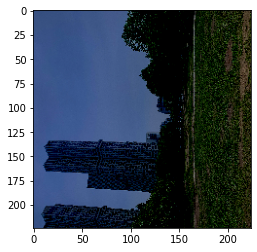

In [14]:
#Import Librarires
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image



#Import resnet model for feature extraction
extract_model = ResNet50(include_top=True)
last = extract_model.layers[-2].output
image_features_extract_model = Model(inputs = extract_model.input,outputs = last)

#Import the CNN RNN model  
reconstructed_model = load_model('model/model_ImageCap_Umair.h5')

#Import tokenizor from pickle file
with open('model/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
    

    
#State vocab size, max length(max tokens)
vocab_size = len(tokenizer.word_index) 
max_tokens = 73
START_TOKEN = '<start> '
END_TOKEN = ' <end>'
token_start = tokenizer.word_index[START_TOKEN.strip()]
token_end = tokenizer.word_index[END_TOKEN.strip()]


#Import the file, incase of an application the user will upload the file here
#image_path = 'flickr30k_images/flickr30k_images/1000366164.jpg'
image_path = 'testimg/green.JPG'
#Presprocess the image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
image = tf.keras.applications.resnet.preprocess_input(x)

#Use the prediction coding,extarct image features from ResNet50 model and RNN features from ------>
#Reconstructed model, use that model to predict
encoder_input = image_features_extract_model.predict(image)
encoder_input = tf.reshape(encoder_input,
                             (2048, ))

encoder_input = np.expand_dims(encoder_input, axis=0)

shape = (1, max_tokens)
decoder_input = np.zeros(shape=shape, dtype=np.int)

token_id = token_start

output=[]

count_tokens = 0

while token_id != token_end and count_tokens < max_tokens:
    
    decoder_input[0, count_tokens] = token_id

    input_data ={'encoder_input':encoder_input ,'decoder_input': decoder_input}
    
    predict = reconstructed_model.predict(input_data)
    
    token_id = np.argmax(predict[0, count_tokens, :])
    
    output.append(token_id)
    
    count_tokens += 1

#Print prediction    
final = tokenizer.sequences_to_texts([output])
print(final)
#Print Image
plt.imshow(np.squeeze(x /255.))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['man is jumping into the water <end>']


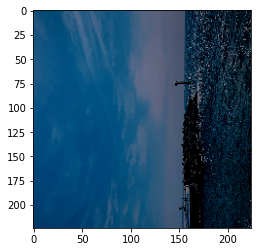

In [15]:
#Import Librarires
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image



#Import resnet model for feature extraction
extract_model = ResNet50(include_top=True)
last = extract_model.layers[-2].output
image_features_extract_model = Model(inputs = extract_model.input,outputs = last)

#Import the CNN RNN model  
reconstructed_model = load_model('model/model_ImageCap_Umair.h5')

#Import tokenizor from pickle file
with open('model/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
    

    
#State vocab size, max length(max tokens)
vocab_size = len(tokenizer.word_index) 
max_tokens = 73
START_TOKEN = '<start> '
END_TOKEN = ' <end>'
token_start = tokenizer.word_index[START_TOKEN.strip()]
token_end = tokenizer.word_index[END_TOKEN.strip()]


#Import the file, incase of an application the user will upload the file here
#image_path = 'flickr30k_images/flickr30k_images/1000366164.jpg'
image_path = 'testimg/sea2.JPG'
#Presprocess the image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
image = tf.keras.applications.resnet.preprocess_input(x)

#Use the prediction coding,extarct image features from ResNet50 model and RNN features from ------>
#Reconstructed model, use that model to predict
encoder_input = image_features_extract_model.predict(image)
encoder_input = tf.reshape(encoder_input,
                             (2048, ))

encoder_input = np.expand_dims(encoder_input, axis=0)

shape = (1, max_tokens)
decoder_input = np.zeros(shape=shape, dtype=np.int)

token_id = token_start

output=[]

count_tokens = 0

while token_id != token_end and count_tokens < max_tokens:
    
    decoder_input[0, count_tokens] = token_id

    input_data ={'encoder_input':encoder_input ,'decoder_input': decoder_input}
    
    predict = reconstructed_model.predict(input_data)
    
    token_id = np.argmax(predict[0, count_tokens, :])
    
    output.append(token_id)
    
    count_tokens += 1

#Print prediction    
final = tokenizer.sequences_to_texts([output])
print(final)
#Print Image
plt.imshow(np.squeeze(x /255.))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['two people are walking on the beach <end>']


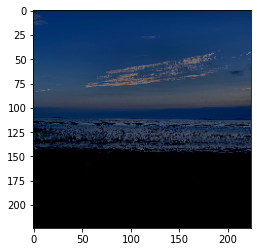

In [16]:
#Import Librarires
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image



#Import resnet model for feature extraction
extract_model = ResNet50(include_top=True)
last = extract_model.layers[-2].output
image_features_extract_model = Model(inputs = extract_model.input,outputs = last)

#Import the CNN RNN model  
reconstructed_model = load_model('model/model_ImageCap_Umair.h5')

#Import tokenizor from pickle file
with open('model/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
    

    
#State vocab size, max length(max tokens)
vocab_size = len(tokenizer.word_index) 
max_tokens = 73
START_TOKEN = '<start> '
END_TOKEN = ' <end>'
token_start = tokenizer.word_index[START_TOKEN.strip()]
token_end = tokenizer.word_index[END_TOKEN.strip()]


#Import the file, incase of an application the user will upload the file here
#image_path = 'flickr30k_images/flickr30k_images/1000366164.jpg'
image_path = 'testimg/sea.JPG'
#Presprocess the image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
image = tf.keras.applications.resnet.preprocess_input(x)

#Use the prediction coding,extarct image features from ResNet50 model and RNN features from ------>
#Reconstructed model, use that model to predict
encoder_input = image_features_extract_model.predict(image)
encoder_input = tf.reshape(encoder_input,
                             (2048, ))

encoder_input = np.expand_dims(encoder_input, axis=0)

shape = (1, max_tokens)
decoder_input = np.zeros(shape=shape, dtype=np.int)

token_id = token_start

output=[]

count_tokens = 0

while token_id != token_end and count_tokens < max_tokens:
    
    decoder_input[0, count_tokens] = token_id

    input_data ={'encoder_input':encoder_input ,'decoder_input': decoder_input}
    
    predict = reconstructed_model.predict(input_data)
    
    token_id = np.argmax(predict[0, count_tokens, :])
    
    output.append(token_id)
    
    count_tokens += 1

#Print prediction    
final = tokenizer.sequences_to_texts([output])
print(final)
#Print Image
plt.imshow(np.squeeze(x /255.))